# Histology Tissue Classification Project (HTCP)



(C) [K. Mader](https://www.linkedin.com/in/kevinmader/?originalSubdomain=ch) / [U. Michelucci 2018-2019](https://www.linkedin.com/in/umbertomichelucci/?originalSubdomain=ch)

*Teaching Assistant:* [Khaled Mohamad](https://www.linkedin.com/in/khaled-mohamad-45071a24b/), E-mail: mohamad.khaled@stud.hslu.ch

# Overview

The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge

* Classify tiles correctly into one of the eight classes
* Which classes are most frequently confused?
* What features can be used (like texture, see scikit-image) to improve classification?
* How can these models be applied to the much larger 5000x5000 models? How can this be done efficiently

# Acknowledgements


The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels providing basic analysis of the data

Content This data set represents a collection of textures in histological images of human colorectal cancer. It contains two files:

>     Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
>     histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
>     to exactly one of eight tissue categories (specified by the folder name). 

>     Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
>     larger histological images of 5000 x 5000 px each. These images contain 
>     more than one tissue type. Image format


All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015


# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on kaggle: https://goo.gl/hkRSke

# Ideas for the project

The project can be tackled in several ways and at several levels. Here are some ideas for you to tackle at different difficulty levels.

A few general hints:

- Accuracy is a nice metric, but in this case the confusion matrix is more useful. Check which metric is the most ideal for this problem (you could use others)
- If detecting TUMOR proces too hard, try to detect other tissue types. For example ADIPOSE. Some are much easier to detect than others. 
- __REMEMBER__: detecting __ONE__ type of tissue does not necessarly mean being able to detec __ALL__ type of tissues well ;-)
- __REMEMBER__: getting a high accuracy is __NOT__ the goal of the project. The goal is to put you in a real-life situation where you have to be creative to solve a relevant problem. Is not easy and there are not easy ways of solving it.

__OVER ALL REMEMBER: HAVE FUN!__


## Advance

If you have studied the color distribution in the Easy exercise part, try to build your first pipeline of models: first a manually build classifier (based on distributions) to eliminate easy to detect classes and then a network for the most complex cases.

# Fun!
After having trained a model to classify images, build a "probability map" over the 5000 pixels x 5000 pixels images to detect specific tissue types. A way in which you could do it is to make sliding window on the big image, and let the model give the probability of each slide and then plot an overlay on the big image with (for example) the color intensity proprortional to the probability your model is predicting.
WARNING: this will take some time, but it is really be fun!




##__STARTING WITH__:
## 2. Advance!

# Helper Functions (Python)

In [ ]:
# A function for plotting images

def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    

In [ ]:
# A function to get Label names(are eight)

def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load & Importing Libraries

In [ ]:
# Load python libraries

%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import randint

# Read images from files and plot
from skimage.io import imread 
import seaborn as sns

# Tensorflow & Keras is imported for building and training models
import tensorflow as tf

# Keras 
from tensorflow.keras.models import Sequential # for building the  layers
from tensorflow.keras.optimizers import SGD    # Optimizer 
from tensorflow.keras.layers import Dense      # Connected network

from tensorflow.keras import layers
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, accuracy_score   # Measure performance of your classifier and accuracy
import time

# Checking your TensorFlow Version

In [ ]:
# Checking out your TensorFlow version
ver_1= '2.10.0'

def tf_version(tf):
  tf_v = tf.__version__
  if tf_v >= ver_1:
    print(f" Your veriosn of TensorFlow is a:{tf_v}  satisfied!")
  else:
    print("Your new version of TensroFlow updating ....")
    !pip3 install --upgrade tensorflow

tf_version(tf)


 Your veriosn of TensorFlow is a:2.10.0  satisfied!


# Load the Data

In [ ]:
# Know Image Dimensions
def know_image_dim(in_shape):

    side_len = int(np.sqrt(in_shape))
    abs_value = np.abs(in_shape-side_len*side_len)<2
    negative_value = side_len = int(np.sqrt(in_shape/3))

    if abs_value:
        return (int(side_len), int(side_len))
    else:
        negative_value
        return (side_len, side_len, 3)
        
csv_dir = os.path.join('.', '/content/data')
print(f"My current working directory is: {csv_dir} ")

My current working directory is: /content/data 


In [ ]:
# Return all file names from current directory and sort in ascending orders(shaps)
all_files = sorted(glob(os.path.join(csv_dir, 'HTCP*.csv')), 
                   key=lambda x: os.stat(x).st_size)

all_df_dict = {os.path.splitext(os.path.basename(x))[0]: pd.read_csv(x) for x in all_files}
print("VECTOR SIZE FOR EVERY DATASET:\n")
for c_key in all_df_dict.keys():
    print(c_key, 'vector length:',  
          all_df_dict[c_key].shape[1], '->', 
            know_image_dim(all_df_dict[c_key].shape[1]))

VECTOR SIZE FOR EVERY DATASET:

HTCP_8_8_L vector length: 65 -> (4, 4)
HTCP_8_8_RGB vector length: 193 -> (8, 8, 3)
HTCP_28_28_L vector length: 785 -> (16, 16)
HTCP_28_28_RGB vector length: 2353 -> (28, 28, 3)
HTCP_64_64_L vector length: 4097 -> (36, 36)


In [ ]:
all_files

['/content/data/HTCP_8_8_L.csv',
 '/content/data/HTCP_8_8_RGB.csv',
 '/content/data/HTCP_28_28_L.csv',
 '/content/data/HTCP_28_28_RGB.csv',
 '/content/data/HTCP_64_64_L.csv']

In [ ]:
# Read csv file from list(all_files)
data = pd.read_csv(all_files[2])

Let's create an array with labels (not yet one-encoded) and one for the images.

In [ ]:
# Get the labels from the data
labels = data['label']
data = data.drop(['label'], axis = 1)


# Baseline models with 28x28 gray images

In [ ]:
from sklearn.model_selection import train_test_split
sample_id_count = list(all_df_dict.values())[0].shape[0]
train_ids, test_ids = train_test_split(range(sample_id_count), 
                                       test_size=0.25, 
                                       random_state=2018)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_models(in_model_maker):
    fig, m_axs = plt.subplots(1, 5, figsize = (25, 5))
    for c_ax, c_key in zip(m_axs, all_df_dict.keys()):
        # c_key is for example HTCP_8_8_L (the file/type name)
        c_df = all_df_dict[c_key].copy()
        c_label = c_df.pop('label') # return column and drop from dataframe
        c_model = in_model_maker() # function of the model
        c_model.fit(c_df.iloc[train_ids, :], c_label.iloc[train_ids]) # fit of the model
        c_pred = c_model.predict(c_df.iloc[test_ids, :]) # prediction
        sns.heatmap(confusion_matrix(c_label.iloc[test_ids], c_pred), 
                    annot=True, cbar=False, fmt='d', ax=c_ax)
        c_ax.set_title(f'Accuracy: {accuracy_score(c_label[test_ids],c_pred)*100:2.2f}%\n{c_key}')

# Example of a network with 4 layers, each with 10 neurons

In [ ]:
class NBatchLogger(keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def __init__(self, display):
        self.step = 0
        self.display = display
        self.metric_cache = {}

    def on_batch_end(self, batch, logs=None):
        self.step += 1
        for k in self.model.metrics:
            if k.name not in self.metric_cache.keys():
                self.metric_cache[k.name] = 0.0
            self.metric_cache[k.name] += logs.get(k.name)
        if self.step % self.display == 0:
            metrics_log = ''
            for (k, v) in self.metric_cache.items():
                val = v / self.display
                if abs(val) > 1e-3:
                    metrics_log += ' - %s: %.4f' % (k, val)
                else:
                    metrics_log += ' - %s: %.4e' % (k, val)
            print('step: {}/{} ... {}'.format(self.step,
                                          self.params['steps'],
                                          metrics_log))
            self.metric_cache.clear()

In [ ]:
# Make a copy of Data and Labels.
c_df = all_df_dict['HTCP_28_28_L'].copy()
c_label = c_df.pop('label')


In [ ]:
# Split dataset to train and test 
X_train = c_df.iloc[train_ids, :]
y_train = c_label.iloc[train_ids]-1

In [ ]:
X_test = c_df.iloc[test_ids, :]
ytest = c_label.iloc[test_ids]-1

In [ ]:
X_train.shape

(3750, 784)

In [ ]:
# convert class vectors to binary class matrices One Hot Encoding
num_of_classes = 8
y_train = keras.utils.to_categorical(y_train, num_of_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.1, random_state=42)

X_train = X_train / 255.0 / 1.0
X_val = X_val / 255.0 / 1.0

In [ ]:
n = 15
# Network building Phase
model = tf.keras.Sequential()
model.add(layers.Dense(n, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.optimizers.Adam(0.01),
              metrics=['accuracy'])
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                11775     
                                                                 
 dense_6 (Dense)             (None, 15)                240       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dropout_5 (Dropout)         (None, 15)               

In [ ]:
out_batch = NBatchLogger(display=1000)
model.fit(X_train, Y_train, epochs=1000, batch_size=250,verbose = 0,
             callbacks=[out_batch])


step: 1000/14 ...  - loss: 1.4932 - accuracy: 0.3427
step: 2000/14 ...  - loss: 1.3482 - accuracy: 0.3894
step: 3000/14 ...  - loss: 1.3067 - accuracy: 0.4053
step: 4000/14 ...  - loss: 1.2862 - accuracy: 0.4142
step: 5000/14 ...  - loss: 1.2735 - accuracy: 0.4175
step: 6000/14 ...  - loss: 1.2577 - accuracy: 0.4217
step: 7000/14 ...  - loss: 1.2501 - accuracy: 0.4254
step: 8000/14 ...  - loss: 1.2323 - accuracy: 0.4331
step: 9000/14 ...  - loss: 1.2448 - accuracy: 0.4272
step: 10000/14 ...  - loss: 1.2335 - accuracy: 0.4307
step: 11000/14 ...  - loss: 1.2385 - accuracy: 0.4304
step: 12000/14 ...  - loss: 1.2400 - accuracy: 0.4309
step: 13000/14 ...  - loss: 1.2516 - accuracy: 0.4269
step: 14000/14 ...  - loss: 1.2428 - accuracy: 0.4332


In [ ]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=1)
pred = np.argmax(model.predict(X_val), axis=-1)
pred_train = np.argmax(model.predict(X_train), axis=-1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

12/12 [==============================] - 0s 1ms/step - loss: 1.5969 - accuracy: 0.3093
Final loss: 1.596870, final accuracy: 0.309333


# Confusion Matrix for training

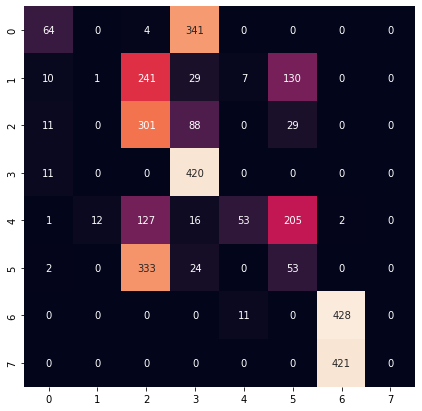

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_train, axis = 1), pred_train), 
                    annot=True, cbar=False, fmt='d', ax=ax)

# Confusion Matrix for dev

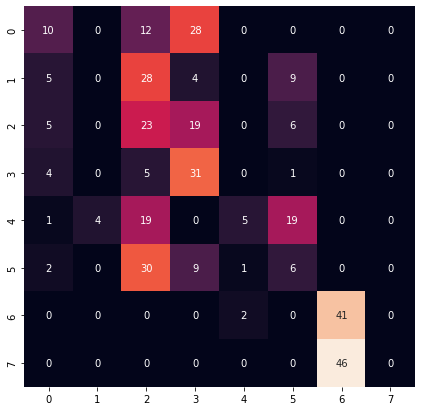

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_val, axis = 1), pred), 
                    annot=True, cbar=False, fmt='d', ax=ax)

#CNN

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 8], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [ ]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters):
    
        # Shape of the filter-weights for the convolution
    shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
    weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
    biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
    layer += biases
        
    return layer, weights

In [ ]:
def new_pool_layer(input):
    
        # TensorFlow operation for convolution
    layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
    return layer

In [ ]:
def new_relu_layer(input):
    
    #with tf.variable_scope(name) as scope:
    # TensorFlow operation for convolution
    layer = tf.nn.relu(input)
        
    return layer

In [ ]:
def new_fc_layer(input, num_inputs, num_outputs):
         # Create new weights and biases.
    weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
    biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases
        
    return layer

In [ ]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=32) # 6

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1)

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1)

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=32, filter_size=5, num_filters=32)

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2)

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2)

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128)

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1)

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=8)

In [ ]:
# Use Softmax function to normalize the output
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [ ]:
# Use Cross entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
# Use Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [ ]:
# Accuracy
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
num_epochs = 100
batch_size = 30

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [ ]:
print ("Training the model for", num_epochs, "epochs.")
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    #writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        #for batch in range(0, int(len(labels_)/batch_size)):
        # X_train, Y_train
        # X_val, Y_val,
            
        for i in range(0, X_train.shape[0], batch_size):
            #if (i%1000 == 0):
            #    print('-->',i)
            x_batch = X_train[i:i + batch_size,:]
            y_true_batch = Y_train[i:i + batch_size,:]
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
        train_accuracy = sess.run(accuracy, feed_dict={x:X_train, y_true:Y_train})
        
        # Generate summary and validate the model on the entire validation set
        vali_accuracy = sess.run(accuracy, feed_dict={x:X_val, y_true:Y_val})
        #writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        if (epoch % 5 == 0):
            print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
            print("\tAccuracy:")
            print ("\t- Training Accuracy:\t{}".format(train_accuracy))
            print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))
            
    pred = sess.run(y_pred_cls, feed_dict={x:X_train, y_true:Y_train})
            
print("\n\nFinal Accuracy:")
print ("- Training Accuracy:\t{}".format(train_accuracy))
print ("- Validation Accuracy:\t{}".format(vali_accuracy))

Training the model for 100 epochs.
Epoch 1 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.44503703713417053
	- Validation Accuracy:	0.3893333375453949
Epoch 6 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.633481502532959
	- Validation Accuracy:	0.6186666488647461
Epoch 11 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.7122963070869446
	- Validation Accuracy:	0.6666666865348816
Epoch 16 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.7078518271446228
	- Validation Accuracy:	0.6426666378974915
Epoch 21 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.7896296381950378
	- Validation Accuracy:	0.7013333439826965
Epoch 26 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.7519999742507935
	- Validation Accuracy:	0.6426666378974915
Epoch 31 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.8995555639266968
	- Validation Accuracy:	0.6613333225250244
Epoch 36

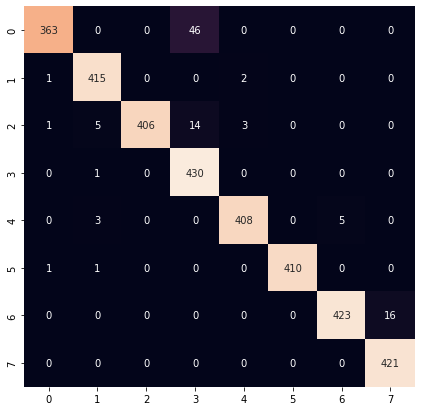

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_train, axis = 1), pred), 
                    annot=True, cbar=False, fmt='d', ax=ax)